# Analisis Sentimen aplikasi Shopee di Google Playstore

Adapun kriteria penilaian mencakup seperti berikut:
1. Menggunakan algoritma Deep Learning
2. Akurasi pada training set dan testing set di atas 92%
3. Dataset memiliki minimal 3 kelas
4. Proses scraping data harus mengambil minimal 10.000 sampel data.
5. Melakukan 3 percobaan skema pelatihan yang berbeda. Skema ini dapat dibedakan dari variasi algoritma pelatihan, metode ekstraksi fitur, pelabelan, dan pembagian data dengan memilih minimal 2 kombinasi.

## Scraping Data dari Shopee
pengambilan sempel sebanyak 5.000 sampel data

### Inisiasi Library

In [ ]:
# Intalasi library
%pip install google-play-scraper
%pip install wordcloud
%pip install Sastrawi
%pip install gensim
%pip install --upgrade numpy
%pip install --upgrade gensim
# Inisiasi libary
from google_play_scraper import app, reviews, Sort, reviews_all
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import datetime as data
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Dropout, Embedding, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import csv
import requests
from io import StringIO
import os
from google_play_scraper import reviews, Sort
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Input
from tensorflow.keras.layers import Dense, GRU, Dropout
import optuna
from collections import Counter
from sklearn.model_selection import StratifiedKFold

  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.13.1.tar.gz (57.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [54 lines of output]
      + meson setup /private/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/pip-install-n6kavvl6/scipy_d4a16ec5ab4d495ba444106a58a5383b /private/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/pip-install-n6kavvl6/scipy_d

## Scraping Dataset

In [ ]:
# Max_Reviews = 20000

# # Scraping ulasan Shopee (10 ulasan)
# Shopee_scrapreview, _ = reviews(
#     'com.shopee.id',
#     lang='id',
#     country='id',
#     sort=Sort.MOST_RELEVANT,
#     count=Max_Reviews
# )

# # Simpan ke CSV
# with open('ulasan_aplikasi_Shopee.csv', mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Review'])  # Tambahkan header

#     for review in Shopee_scrapreview:
#         writer.writerow([review['content']])

#     print("Scraping selesai! Data disimpan dalam 'ulasan_aplikasi_Shopee.csv'.")

Scraping selesai! Data disimpan dalam 'ulasan_aplikasi_Shopee.csv'.


## Loading Dataset

In [5]:
Shopee_reviews_df = pd.DataFrame(Shopee_scrapreview)
Shopee_reviews_df.shape
Shopee_reviews_df.head()
Shopee_reviews_df.to_csv('ulasan_aplikasi_Shopee.csv', index=False)
# Membuat DataFrame dari hasil scrapreview
Shopee_reviews_df = pd.DataFrame(Shopee_scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = Shopee_reviews_df.shape
Shopee_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,45d20293-c52a-4fea-a0a4-2daf988b1545,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sy belanja di Shopee banyak pengalaman baru da...,5,903,3.45.60,2025-03-17 07:16:54,"Hi Kak Yulianti Yanti, makasih ya untuk review...",2025-03-17 08:22:35,3.45.60
1,0e93f025-d488-4b3c-8757-d8a79d917b48,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pliss ya admin minta tolong ini mah. tolong be...,3,74,3.45.60,2025-03-17 22:40:44,"Hai kak Dahlia Azzahra, maaf ya udah bikin kak...",2025-03-17 23:11:55,3.45.60
2,65f687ef-e111-47fa-a73d-49d019da9a0c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,shoope tidak berkerja dengan baik saat melihat...,1,89,3.45.60,2025-03-17 07:32:52,"Hi Kak Dwi Sya, maaf udah buat ga nyaman terka...",2025-03-17 08:56:27,3.45.60
3,964c0e96-f702-45c2-b1b3-0ab157c12a61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Jauh dari kata memuaskan, kebiasaan buruk plat...",1,91,3.45.60,2025-03-17 04:20:28,None,NaT,3.45.60
4,005e872e-c25b-496c-b9ec-0ed09d7fbbae,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi jelek... masuk akun slalu error sanga...,5,636,3.44.26,2025-03-17 18:38:27,hai kak makasih ya untuk feedbacknya. feedback...,2023-07-26 00:27:17,3.44.26


In [6]:
Shopee_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              20000 non-null  object        
 1   userName              20000 non-null  object        
 2   userImage             20000 non-null  object        
 3   content               20000 non-null  object        
 4   score                 20000 non-null  int64         
 5   thumbsUpCount         20000 non-null  int64         
 6   reviewCreatedVersion  19631 non-null  object        
 7   at                    20000 non-null  datetime64[ns]
 8   replyContent          18199 non-null  object        
 9   repliedAt             18199 non-null  datetime64[ns]
 10  appVersion            19631 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.7+ MB


In [7]:
Shopee_clean_df = Shopee_reviews_df.dropna()

In [8]:
Shopee_clean_df = Shopee_clean_df.drop_duplicates()

In [9]:
Shopee_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17874 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              17874 non-null  object        
 1   userName              17874 non-null  object        
 2   userImage             17874 non-null  object        
 3   content               17874 non-null  object        
 4   score                 17874 non-null  int64         
 5   thumbsUpCount         17874 non-null  int64         
 6   reviewCreatedVersion  17874 non-null  object        
 7   at                    17874 non-null  datetime64[ns]
 8   replyContent          17874 non-null  object        
 9   repliedAt             17874 non-null  datetime64[ns]
 10  appVersion            17874 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.6+ MB


## Preprocessing Text

In [10]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9] + ', '', text) # Menghapus tanda mention(@)
    text = re.sub(r'#[A-Za-z0-9] + ', '', text) # Menghapus tanda hashtag(#)
    text = re.sub(r'RT[\s]', '', text)          # Menghapus RT(Retweet)
    text = re.sub(r"http\S+", '', text)         # Menghapus link
    text = re.sub(r'[0-9]+', '', text)          # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)         # Menghapus karakter selain huruf dan angka

    text = text.replace('\n', '')               # Mengganti garis baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus semua tanda baca
    text = text.strip(' ')                      # Menghapus karakter spasi dari kiri dan kanan teks
    return text

def caseFoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string/teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filterText(text): # Menghapus stopwords dalam teks baik dalam bahasa Indonesia maupun Inggris
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemText(text): # Mengurangi kata ke bentuk dasarnya dimana imbuhan awalan dan akhiran dihapus atau menjadi ke akar kata
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

def fix_slangwords(text):
    slangwords = {
        "@": "di",
        "abis": "habis",
        "wtb": "beli",
        "masi": "masih",
        "wts": "jual",
        "wtt": "tukar",
        "bgt": "banget",
        "maks": "maksimal",
        "gak": "tidak",
        "gue": "saya",
        "lu": "kamu",
        "btw": "ngomong-ngomong",
        "mantul": "mantap betul"
    }

    # Menghapus tanda baca kecuali spasi
    text = re.sub(r'[^\w\s]', '', text)

    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [11]:
nltk.download('punkt_tab')
nltk.download('stopwords')

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
Shopee_clean_df['text_clean'] = Shopee_clean_df['content'].apply(clean_text)
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
Shopee_clean_df['text_casefoldingText'] = Shopee_clean_df['text_clean'].apply(caseFoldingText)
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
Shopee_clean_df['text_slangwords'] = Shopee_clean_df['text_casefoldingText'].apply(fix_slangwords)
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
Shopee_clean_df['text_tokenizingText'] = Shopee_clean_df['text_slangwords'].apply(tokenizingText)
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
Shopee_clean_df['text_stopword'] = Shopee_clean_df['text_tokenizingText'].apply(filterText)
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
Shopee_clean_df['text_akhir'] = Shopee_clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
Shopee_clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,45d20293-c52a-4fea-a0a4-2daf988b1545,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sy belanja di Shopee banyak pengalaman baru da...,5,903,3.45.60,2025-03-17 07:16:54,"Hi Kak Yulianti Yanti, makasih ya untuk review...",2025-03-17 08:22:35,3.45.60,Sy belanja di Shopee banyak pengalaman baru da...,sy belanja di shopee banyak pengalaman baru da...,sy belanja di shopee banyak pengalaman baru da...,"[sy, belanja, di, shopee, banyak, pengalaman, ...","[sy, belanja, shopee, pengalaman, kenyamanan, ...",sy belanja shopee pengalaman kenyamanan tdk ca...
1,0e93f025-d488-4b3c-8757-d8a79d917b48,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,pliss ya admin minta tolong ini mah. tolong be...,3,74,3.45.60,2025-03-17 22:40:44,"Hai kak Dahlia Azzahra, maaf ya udah bikin kak...",2025-03-17 23:11:55,3.45.60,pliss ya admin minta tolong ini mah tolong ben...,pliss ya admin minta tolong ini mah tolong ben...,pliss ya admin minta tolong ini mah tolong ben...,"[pliss, ya, admin, minta, tolong, ini, mah, to...","[pliss, admin, tolong, mah, tolong, benerin, s...",pliss admin tolong mah tolong benerin sistemny...
2,65f687ef-e111-47fa-a73d-49d019da9a0c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,shoope tidak berkerja dengan baik saat melihat...,1,89,3.45.60,2025-03-17 07:32:52,"Hi Kak Dwi Sya, maaf udah buat ga nyaman terka...",2025-03-17 08:56:27,3.45.60,shoope tidak berkerja dengan baik saat melihat...,shoope tidak berkerja dengan baik saat melihat...,shoope tidak berkerja dengan baik saat melihat...,"[shoope, tidak, berkerja, dengan, baik, saat, ...","[shoope, berkerja, keranjang, melacak, pesanan...",shoope berkerja keranjang melacak pesanan eror...
4,005e872e-c25b-496c-b9ec-0ed09d7fbbae,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi jelek... masuk akun slalu error sanga...,5,636,3.44.26,2025-03-17 18:38:27,hai kak makasih ya untuk feedbacknya. feedback...,2023-07-26 00:27:17,3.44.26,Aplikasi jelek masuk akun slalu error sangat r...,aplikasi jelek masuk akun slalu error sangat r...,aplikasi jelek masuk akun slalu error sangat r...,"[aplikasi, jelek, masuk, akun, slalu, error, s...","[aplikasi, jelek, masuk, akun, slalu, error, r...",aplikasi jelek masuk akun slalu error rawan me...
5,741379e4-86a5-44e0-9079-4f65c9c7fc16,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kalo untuk Shopee nya sih Not Bad, Suka juga b...",4,28,3.45.60,2025-03-18 15:27:12,"Hai kak Yulianti Panjaitan, maaf ya udah buat ...",2025-03-18 16:51:51,3.45.60,Kalo untuk Shopee nya sih Not Bad Suka juga be...,kalo untuk shopee nya sih not bad suka juga be...,kalo untuk shopee nya sih not bad suka juga be...,"[kalo, untuk, shopee, nya, sih, not, bad, suka...","[kalo, shopee, bad, suka, belanja, dsini, tau,...",kalo shopee bad suka belanja dsini tau x pesan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,31124498-fe16-4600-a0d6-3c945d92295d,Yettno Lengkong,https://play-lh.googleusercontent.com/a-/ALV-U...,"Apk suka ngelag pdhl udh versi trbaru, dia san...",2,0,3.38.35,2024-12-07 17:27:05,"Hi kak, mohon maaf udah bikin ga nyaman terkai...",2024-12-07 18:10:49,3.38.35,Apk suka ngelag pdhl udh versi trbaru dia sang...,apk suka ngelag pdhl udh versi trbaru dia sang...,apk suka ngelag pdhl udh versi trbaru dia sang...,"[apk, suka, ngelag, pdhl, udh, versi, trbaru, ...","[apk, suka, ngelag, pdhl, udh, versi, trbaru, ...",apk suka ngelag pdhl udh versi trbaru telat me...
19996,a9c217c2-33c0-4bd6-8116-0b131f208365,Sagimin Sagimin,https://play-lh.googleusercontent.com/a-/ALV-U...,sangat cocok dalm segala kebutuhan kumplit di ...,5,0,3.45.60,2025-03-17 19:18:05,"Hai kak Sagimin, makasih ya bintang dan review...",2025-03-17 20:58:31,3.45.60,sangat coc

## Pelabelan

In [13]:
def fetch_lexicon(source):
    """
    Fungsi untuk mengambil data CSV dari URL atau dari file lokal dan mengonversinya menjadi dictionary.
    - Jika `source` adalah URL, maka mengambil data dari internet.
    - Jika `source` adalah path file lokal, maka membaca file dari sistem lokal.
    """
    lexicon = dict()

    # Cek apakah source adalah URL atau path lokal
    if source.startswith("http"):
        try:
            response = requests.get(source)
            if response.status_code == 200:
                reader = csv.reader(StringIO(response.text), delimiter=',')
                next(reader, None)  # Lewati baris pertama (header), jika ada
                for row in reader:
                    lexicon[row[0]] = int(row[1])  # Simpan kata dan skornya dalam dictionary
            else:
                print(f"Failed to fetch lexicon data from {source}")
        except requests.RequestException as e:
            print(f"Error fetching URL: {e}")
    elif os.path.exists(source):  # Cek apakah file lokal tersedia
        try:
            with open(source, mode="r", encoding="utf-8") as file:
                reader = csv.reader(file)
                next(reader, None)  # Lewati baris pertama (header), jika ada
                for row in reader:
                    lexicon[row[0]] = int(row[1])  # Simpan kata dan skornya dalam dictionary
        except Exception as e:
            print(f"Error reading local file {source}: {e}")
    else:
        print(f"Source '{source}' is neither a valid URL nor an existing file path.")

    return lexicon

In [14]:
import csv

# Data kata-kata netral dalam dictionary
neutral = {
    "biasa": 0,
    "standar": 0,
    "umum": 0,
    "produk": 0,
    "barang": 0,
    "harga": 0,
    "toko": 0,
    "pelanggan": 0,
    "tersedia": 0,
    "menggunakan": 0,
    "melihat": 0,
    "membeli": 0,
    "menjual": 0,
}

# Nama file untuk disimpan
filename = "lexicon_neutral.csv"

# Menyimpan dictionary ke dalam file CSV
with open(filename, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)

    # Menulis header
    writer.writerow(["kata", "score"])

    # Menulis setiap pasangan kata dan skor
    for word, score in neutral.items():
        writer.writerow([word, score])

print(f"File '{filename}' berhasil dibuat.")

File 'lexicon_neutral.csv' berhasil dibuat.


In [15]:
# Mendapatkan kata-kata positif, negatif, dan netral dari GitHub
lexicon_positive = fetch_lexicon('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
lexicon_negative = fetch_lexicon('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
lexicon_neutral = fetch_lexicon('lexicon_neutral.csv')

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0  # Inisialisasi skor sentimen
    for word in text:
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if(word in lexicon_negative):
            score = score + lexicon_negative[word]

    for word in text:
        if(word in lexicon_neutral):
            score = score + lexicon_neutral[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    elif (score == 0):
        polarity = 'neutral'

    return score, polarity


In [17]:
results = Shopee_clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Memisahkan hasil (karena fungsi mengembalikan tiga nilai)
results = list(zip(*results))

# Menyimpan hasil ke dalam DataFrame
Shopee_clean_df['polarity_score'] = results[0]
Shopee_clean_df['polarity'] = results[1]

# Menampilkan jumlah masing-masing polaritas
print(Shopee_clean_df['polarity'].value_counts())

polarity
positive    8527
negative    8203
neutral     1144
Name: count, dtype: int64


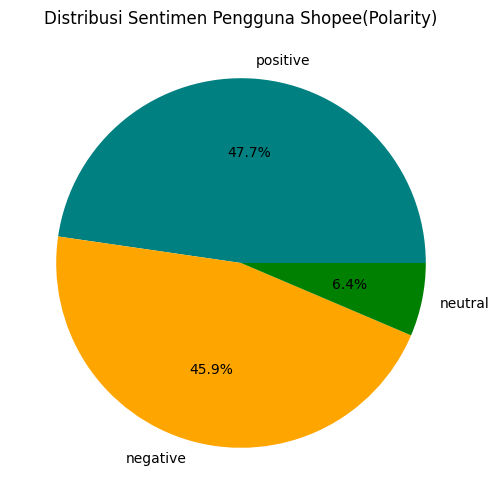

In [18]:
# Visualisasi pie chart
polarity_counts = Shopee_clean_df['polarity'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', colors=['teal', 'orange', 'green'])
plt.title("Distribusi Sentimen Pengguna Shopee(Polarity)")
plt.show()

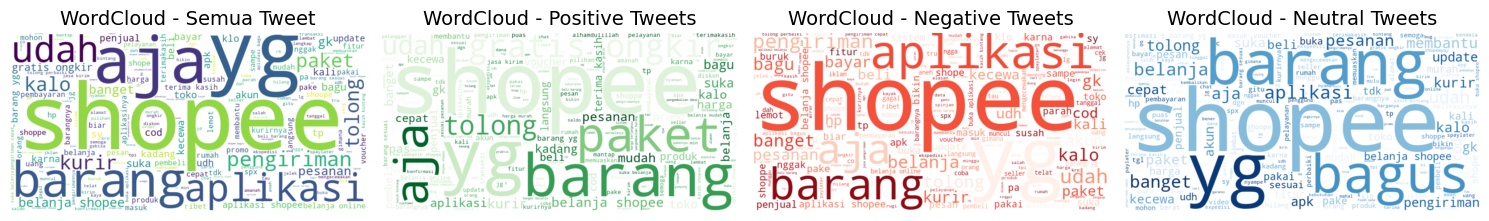

In [19]:
from wordcloud import WordCloud

# WordCloud Secara General (Semua Tweet)
all_text = " ".join(Shopee_clean_df['text_akhir'])  # Gabungkan semua teks tweet
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# WordCloud untuk Positive Tweets
positive_text = " ".join(Shopee_clean_df[Shopee_clean_df['polarity'] == 'positive']['text_akhir'])  # Gabungkan tweet positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# WordCloud untuk Negative Tweets
negative_text = " ".join(Shopee_clean_df[Shopee_clean_df['polarity'] == 'negative']['text_akhir'])  # Gabungkan tweet negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# WordCloud untuk Neutral Tweets
neutral_text = " ".join(Shopee_clean_df[Shopee_clean_df['polarity'] == 'neutral']['text_akhir'])  # Gabungkan tweet negatif
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)

# Menampilkan ketiga WordCloud
plt.figure(figsize=(15, 10))

# WordCloud General
plt.subplot(1, 4, 1)
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Semua Tweet", fontsize=14)

# WordCloud Positive Tweets
plt.subplot(1, 4, 2)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Positive Tweets", fontsize=14)

# WordCloud Negative Tweets
plt.subplot(1, 4, 3)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Negative Tweets", fontsize=14)

# WordCloud Neutral Tweets
plt.subplot(1, 4, 4)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Neutral Tweets", fontsize=14)

plt.tight_layout()
plt.show()

# Data Spliting dan Ekstraksi Fitur
Proses ini dilakukan dengan 3 skema pelatihan yang berbeda, yaitu variasi algoritma, metode ekstraksi fitur, pelabelan, dan pembagian data dengan minimal 2 kombinasi.

**Pilihan Ekstraksi Fitur :**
1. Word2Vec
2. Term Frequency-Inverse Document Frequency (TF-IDF)
3. Bag of Words (BoW)
4. N-gram

**Pilihan Pelaihan Model :**
1. CNN
2. LSTM
3. GRU

Urutan Lp,bomaso:
1. Word2Vec, CNN, 70/30
2. Word2Vec, LSTM, 70/30
3. Word2Vec, GRU, 70/30
4. TF-IDF, CNN, 70/30
5. TF-IDF, LSTM, 70/30
6. TF-IDF, GRU, 70/30
7. BoW, CNN, 70/30
8. BoW, LSTM, 70/30
9. BoW, GRU, 70/30
10. N-gram, CNN, 70/30
11. N-gram, LSTM, 70/30
12. N-gram, GRU, 70/30

In [20]:
def visualize(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    plt.show()

In [145]:
# Membagi Target dan Features
X = np.array(Shopee_clean_df['text_akhir'])
y = np.array(Shopee_clean_df['polarity'])

## Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(17872, 200)
{'negative': 0, 'neutral': 1, 'positive': 2}
Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5512 - loss: 0.8954 - val_accuracy: 0.6406 - val_loss: 0.7940
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6340 - loss: 0.8142 - val_accuracy: 0.6459 - val_loss: 0.7817
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6319 - loss: 0.8051 - val_accuracy: 0.6501 - val_loss: 0.7780
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.6426 - loss: 0.7852 - val_accuracy: 0.6425 - val_loss: 0.7859
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6433 - loss: 0.7896 - val_accuracy: 0.6520 - val_loss: 0.7732
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.6391 - loss: 0.7926 - val_accuracy: 0.6565 - val_loss: 0.7731
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.6482 - loss: 0.7792 - val_accuracy: 0.6515 - val_loss: 0.7748
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6381 - loss: 0.7883 - val_accuracy: 0.6

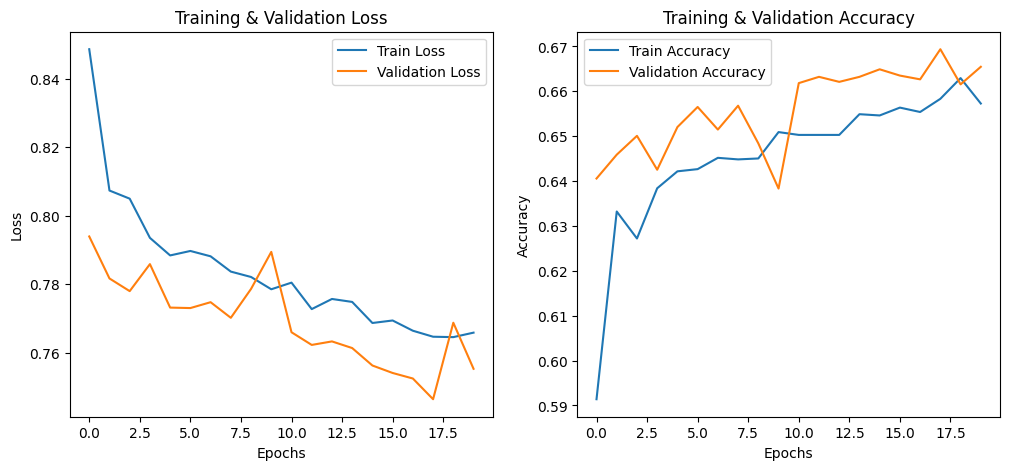

In [ ]:
nltk.download('punkt')

# Tokenisasi teks dengan Word2Vec(ubah menjadi list of words)
X_tokens = [word_tokenize(text.lower()) for text in X]
model_w2v = Word2Vec(sentences=X_tokens,
                     vector_size=200,
                     window=1,
                     min_count=2,
                     workers=4)
def text_to_vector(text, model):
    words = word_tokenize(text.lower())  # Tokenisasi
    vectors = [model.wv[word] for word in words if word in model.wv]  # Ambil vektor kata yang tersedia

    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  # Rata-rata vektor kata dalam teks
    else:
        return np.zeros(model.vector_size)  # Jika tidak ada kata yang cocok, pakai vektor nol
    
# Konversi semua teks menjadi vektor
X_vectorized = np.array([text_to_vector(text, model_w2v) for text in X])

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)
y_encoded = to_categorical(y_numeric, num_classes=3)
# Normalisasi fitur (Word2Vec vectors)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_vectorized)
# Membagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_numeric)

# Membuat model Deep Learning
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(200,)),  # Input layer
    layers.Dropout(0.2),  # Prevent overfitting
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dropout(0.1),
    layers.Dense(3, activation='softmax')  # Output layer (3 kelas)
])
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training model
MLP_W2V = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128)

history_mlp = MLP_W2V.history

visualize(history_mlp)

## TF-IDF

(17872, 5000)
Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.6660 - val_accuracy: 0.8397 - val_loss: 0.4156
Epoch 2/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9088 - loss: 0.2358 - val_accuracy: 0.8509 - val_loss: 0.4218
Epoch 3/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9632 - loss: 0.1062 - val_accuracy: 0.8414 - val_loss: 0.5457
Epoch 4/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9833 - loss: 0.0511 - val_accuracy: 0.8467 - val_loss: 0.6486
Epoch 5/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.8453 - val_loss: 0.8050
Epoch 6/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9979 - loss: 0.0090 - val_accuracy: 0.8509 - val_loss: 0.8606
Epoch 7/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.8490 - val_loss: 0.9205
Epoch 8/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9996 - loss: 0.0022 - val_accuracy: 0.8481 - val_

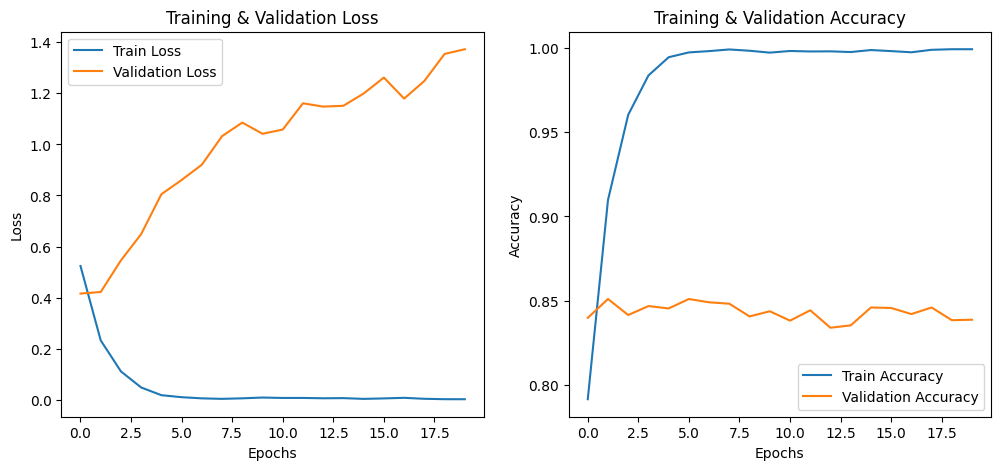

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Ambil 5000 fitur paling penting
X_tfidf = vectorizer.fit_transform(X).toarray()  # Konversi ke array numpy

# Cek bentuk data hasil ekstraksi
print(X_tfidf.shape)  # Harusnya (17872, 5000)

# Konversi label ke angka
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Ubah 'positive', 'negative', 'neutral' jadi angka
y_encoded = to_categorical(y_numeric, num_classes=3)  # One-hot encoding
scaler = MinMaxScaler()
X_tfidf_scaled = scaler.fit_transform(X_tfidf)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_numeric)

# Model MLP untuk TF-IDF
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(5000,)),  # Hidden layer 1
    layers.Dropout(0.3),  # Dropout untuk regularisasi
    layers.Dense(256, activation='relu'),  # Hidden layer 2
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # Output layer (3 kelas)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

history_tfidf = history.history

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Akurasi Model TF-IDF + MLP:", test_acc)
visualize(history_tfidf)

## BoW

Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7061 - loss: 0.6888 - val_accuracy: 0.8378 - val_loss: 0.4310
Epoch 2/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9024 - loss: 0.2617 - val_accuracy: 0.8506 - val_loss: 0.4448
Epoch 3/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9563 - loss: 0.1264 - val_accuracy: 0.8453 - val_loss: 0.6132
Epoch 4/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0558 - val_accuracy: 0.8526 - val_loss: 0.7147
Epoch 5/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9926 - loss: 0.0262 - val_accuracy: 0.8464 - val_loss: 0.8848
Epoch 6/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.8411 - val_loss: 0.9689
Epoch 7/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9938 - loss: 0.0173 - val_accuracy: 0.8543 - val_loss: 0.9762
Epoch 8/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9976 - loss: 0.0113 - val_accuracy: 0.8529 - val

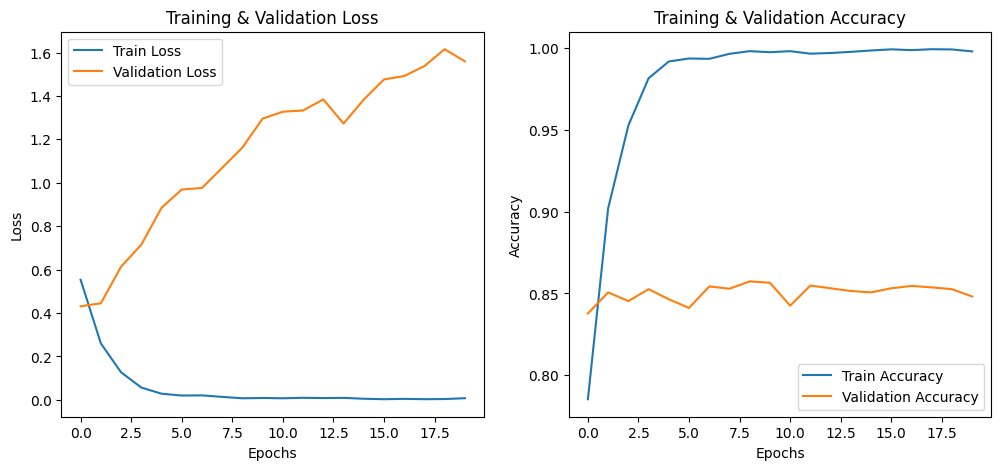

In [ ]:
# BoW Vectorizer (ambil 5000 fitur kata paling sering muncul)
vectorizer = CountVectorizer(max_features=5000)  
X_bow = vectorizer.fit_transform(X).toarray()  # Konversi ke array numpy

# Konversi label ke angka
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Ubah 'positive', 'negative', 'neutral' jadi angka
y_encoded = to_categorical(y_numeric, num_classes=3)  # One-hot encoding
scaler = MinMaxScaler()
X_bow_scaled = scaler.fit_transform(X_bow)
X_train, X_test, y_train, y_test = train_test_split(X_bow_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_numeric)


# Model MLP untuk BoW
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(5000,)),  # Hidden layer 1
    layers.Dropout(0.3),  # Dropout untuk regularisasi
    layers.Dense(256, activation='relu'),  # Hidden layer 2
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # Output layer (3 kelas)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

history_BoW = history.history

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Akurasi Model BoW + MLP:", test_acc)
visualize(history_BoW)

## N-Gram

Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7070 - loss: 0.6935 - val_accuracy: 0.8179 - val_loss: 0.4782
Epoch 2/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8958 - loss: 0.2793 - val_accuracy: 0.8347 - val_loss: 0.5003
Epoch 3/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9547 - loss: 0.1316 - val_accuracy: 0.8280 - val_loss: 0.6698
Epoch 4/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9856 - loss: 0.0494 - val_accuracy: 0.8215 - val_loss: 0.8621
Epoch 5/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9921 - loss: 0.0234 - val_accuracy: 0.8310 - val_loss: 1.1067
Epoch 6/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.8255 - val_loss: 1.2184
Epoch 7/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.8196 - val_loss: 1.2860
Epoch 8/20
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.8126 - val_

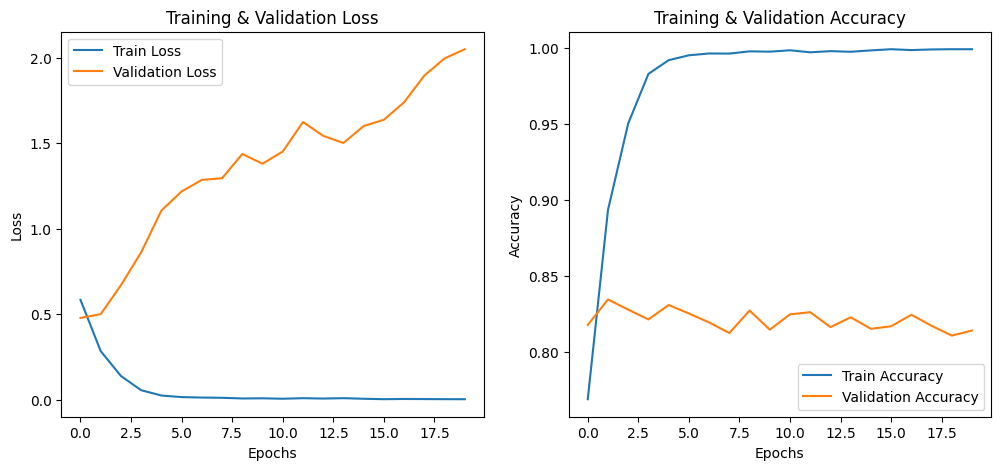

In [ ]:
# N-gram Vectorizer (unigram + bigram, top 5000 kata/phrase)
vectorizer = CountVectorizer(ngram_range=(1,2), max_features=5000)
X_ngram = vectorizer.fit_transform(X).toarray()  # Konversi ke array numpy

# Konversi label ke angka
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Ubah 'positive', 'negative', 'neutral' jadi angka
y_encoded = to_categorical(y_numeric, num_classes=3)  # One-hot encoding
scaler = MinMaxScaler()
X_ngram_scaled = scaler.fit_transform(X_ngram)
X_train, X_test, y_train, y_test = train_test_split(X_ngram_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_numeric)

# Model MLP untuk N-gram
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(5000,)),  # Hidden layer 1
    layers.Dropout(0.3),  # Dropout untuk regularisasi
    layers.Dense(256, activation='relu'),  # Hidden layer 2
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # Output layer (3 kelas)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

history_Ngram = history.history

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Akurasi Model N-gram + MLP:", test_acc)
visualize(history_Ngram)

Ekstraksi fitur ditambah Multi Layer perceptron, ternyata model tidak memiliki generalisasi yang bagus sehingga validation accuracynya memiliki stagnasi. Hal ini **mungkin** terjadi karena ketimpangan jumlah data netral dengan sentimen positif dan negatif, sekarang kita coba menggunakan algoritma Deep Learning lainnya ditambah melakukan oversampling terlebih dahulu. Kemudian kita akan menjalankan beberapa algoritma Deep Learning yang sudah dipaparkan sebelumnya dan melakukan beberapa kombinasi

## Word2Vec, CNN, 70/30

/opt/anaconda3/envs/DL/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1/100


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4216 - loss: 1.2966 - val_accuracy: 0.4821 - val_loss: 1.0058
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4876 - loss: 0.9996 - val_accuracy: 0.4995 - val_loss: 0.9786
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5093 - loss: 0.9756 - val_accuracy: 0.5097 - val_loss: 0.9587
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5233 - loss: 0.9517 - val_accuracy: 0.5243 - val_loss: 0.9500
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5363 - loss: 0.9419 - val_accuracy: 0.5490 - val_loss: 0.9333
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5452 - loss: 0.9312 - val_accuracy: 0.5406 - val_loss: 0.9303
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5497 - loss: 0.9178 - val_accuracy: 0.5685 - val_loss: 0.9054
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5677 - loss: 0.9048 - val_accuracy: 0.5767

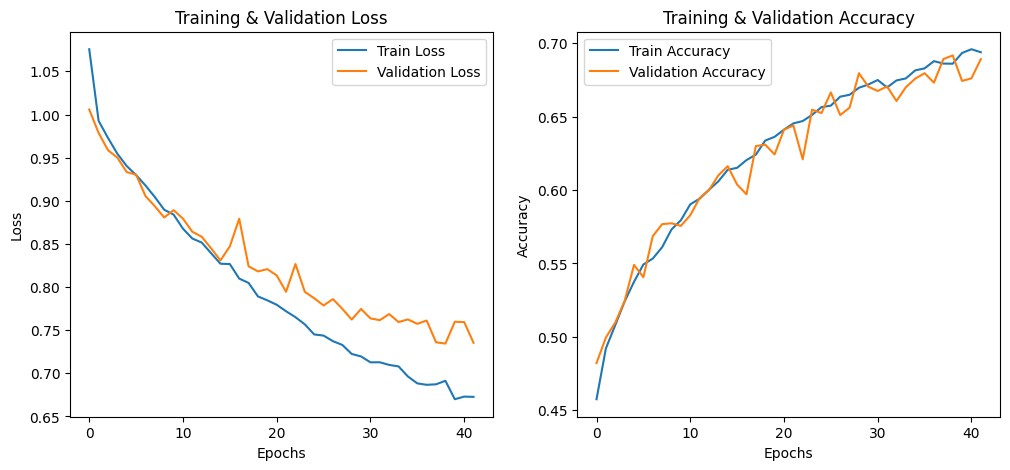

In [ ]:
# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_numeric)
y_resampled = to_categorical(y_resampled, num_classes=3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Reshape data ke format CNN: (samples, features, 1)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Callback untuk Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metrik yang dipantau
    patience=3,          # Jumlah epoch tanpa perbaikan sebelum berhenti
    restore_best_weights=True  # Kembalikan bobot terbaik
)

# Model CNN
model_1 = keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])

# Compile model
model_1.compile(optimizer=Adam(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Training model
history = model_1.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping]
)

history_cnn = history.history

# Evaluasi model
test_loss, test_acc = model_1.evaluate(X_test_reshaped, y_test)
print("Akurasi CNN:", test_acc)

# Visualisasi hasil training
visualize(history_cnn)

## Word2Vec, LSTM, 70/30

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4261 - loss: 1.0721 - val_accuracy: 0.4637 - val_loss: 1.0383
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4618 - loss: 1.0271 - val_accuracy: 0.4678 - val_loss: 1.0198
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 1.0127 - val_accuracy: 0.4790 - val_loss: 1.0106
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4758 - loss: 1.0094 - val_accuracy: 0.4776 - val_loss: 1.0071
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4807 - loss: 1.0074 - val_accuracy: 0.4805 - val_loss: 1.0040
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4871 - loss: 1.0000 - val_accuracy: 0.4807 - val_loss: 1.0071
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 1.0018 - val_accuracy: 0.4805 - val_loss: 1.0000
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 0.9928 - val_accu

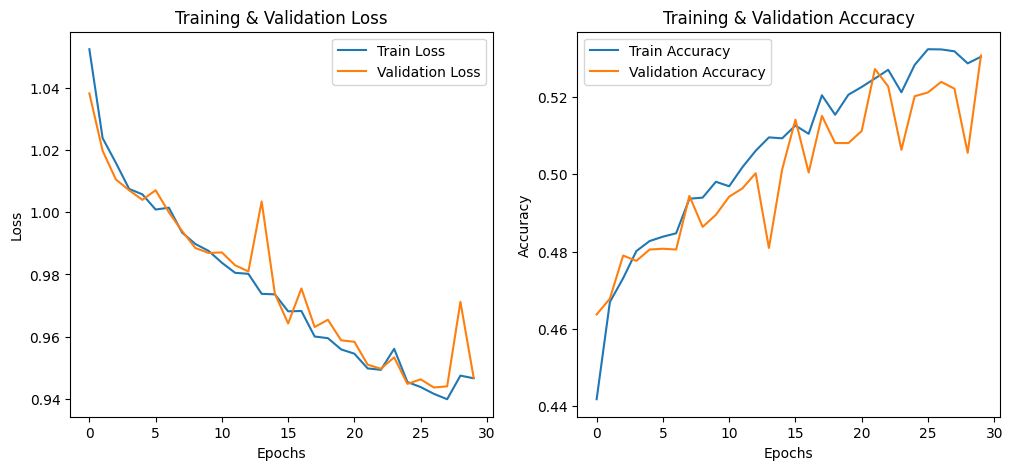

In [240]:
# Reshape data ke format LSTM: (samples, time_steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Callback untuk Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metrik yang dipantau
    patience=3,          # Jumlah epoch tanpa perbaikan sebelum berhenti
    restore_best_weights=True  # Kembalikan bobot terbaik
)

# Model LSTM
model_lstm = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    layers.LSTM(64),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile model
model_lstm.compile(optimizer=Adam(learning_rate=0.0005),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Training model
history = model_lstm.fit(
    X_train_lstm, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test_lstm, y_test),
    callbacks=[early_stopping]
)

lstm_model = history.history

# Evaluasi model
test_loss, test_acc = model_lstm.evaluate(X_test_lstm, y_test)
print("Akurasi LSTM:", test_acc)

# Visualisasi hasil training
visualize(lstm_model)

## Word2Vec, GRU, 70/30


Epoch 1/100


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4156 - loss: 1.0604 - val_accuracy: 0.4356 - val_loss: 1.0298
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4702 - loss: 1.0189 - val_accuracy: 0.4436 - val_loss: 1.0215
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4758 - loss: 1.0141 - val_accuracy: 0.4805 - val_loss: 1.0062
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4900 - loss: 1.0015 - val_accuracy: 0.4868 - val_loss: 0.9999
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4804 - loss: 1.0088 - val_accuracy: 0.4784 - val_loss: 0.9993
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4818 - loss: 1.0027 - val_accuracy: 0.4848 - val_loss: 0.9984
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4892 - loss: 0.9942 - val_accuracy: 0.4880 - val_loss: 0.9971
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4939 - loss: 0.9931 - val_accuracy: 0.4907

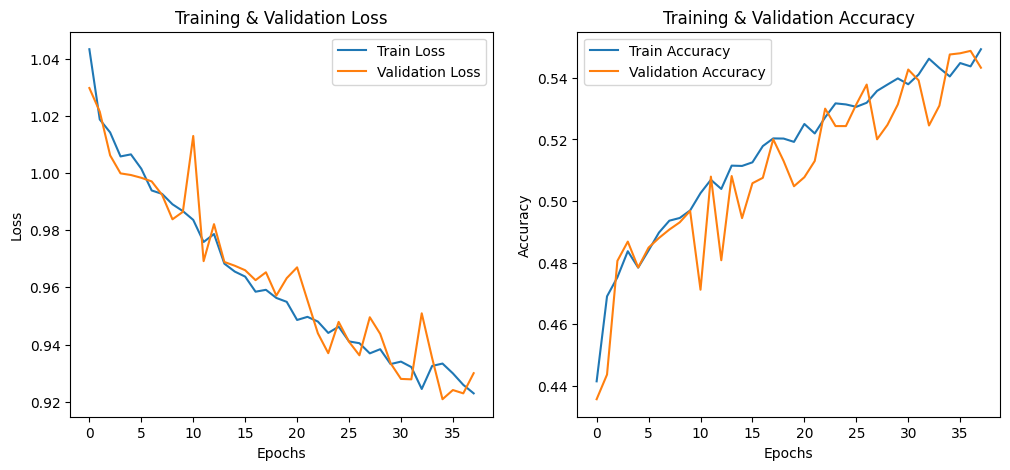

In [241]:
# Reshape data ke format GRU: (samples, time_steps, features)
X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Callback untuk Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Model GRU
model_gru = keras.Sequential([
    layers.GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    layers.GRU(64),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile model
model_gru.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Training model
history = model_gru.fit(
    X_train_gru, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_gru, y_test),
    callbacks=[early_stopping]
)

gru_model = history.history

# Evaluasi model
test_loss, test_acc = model_gru.evaluate(X_test_gru, y_test)
print("Akurasi GRU:", test_acc)

# Visualisasi hasil training
visualize(gru_model)

## TF-IDF, CNN, 70/30

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Ambil 5000 fitur paling penting
X_tfidf = vectorizer.fit_transform(X).toarray()  # Konversi ke array numpy

# Cek bentuk data hasil ekstraksi
print(X_tfidf.shape)  # Harusnya (17872, 5000)

# Konversi label ke angka
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Ubah 'positive', 'negative', 'neutral' jadi angka
y_encoded = to_categorical(y_numeric, num_classes=3)  # One-hot encoding
scaler = MinMaxScaler()
X_tfidf_scaled = scaler.fit_transform(X_tfidf)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_numeric)

# Model CNN
model_cnn = keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

# Compile model
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Reshape data untuk CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training model
history_cnn = model_cnn.fit(X_train_cnn, y_train,
                            epochs=20,
                            batch_size=64,
                            validation_data=(X_test_cnn, y_test),
                            callbacks=[early_stopping])

cnn_model = history_cnn.history

# Evaluasi
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test)
print("Akurasi CNN:", test_acc)

visualize(cnn_model)

## TF-IDF, LSTM, 70/30

(17874, 5000)
Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5765 - loss: 0.8590 - val_accuracy: 0.8462 - val_loss: 0.4096
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8958 - loss: 0.2800 - val_accuracy: 0.8613 - val_loss: 0.3769
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9311 - loss: 0.1719 - val_accuracy: 0.8621 - val_loss: 0.4338
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9566 - loss: 0.1240 - val_accuracy: 0.8459 - val_loss: 0.5169
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9732 - loss: 0.0819 - val_accuracy: 0.8562 - val_loss: 0.6515
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3702
Akurasi LSTM: 0.8612587451934814


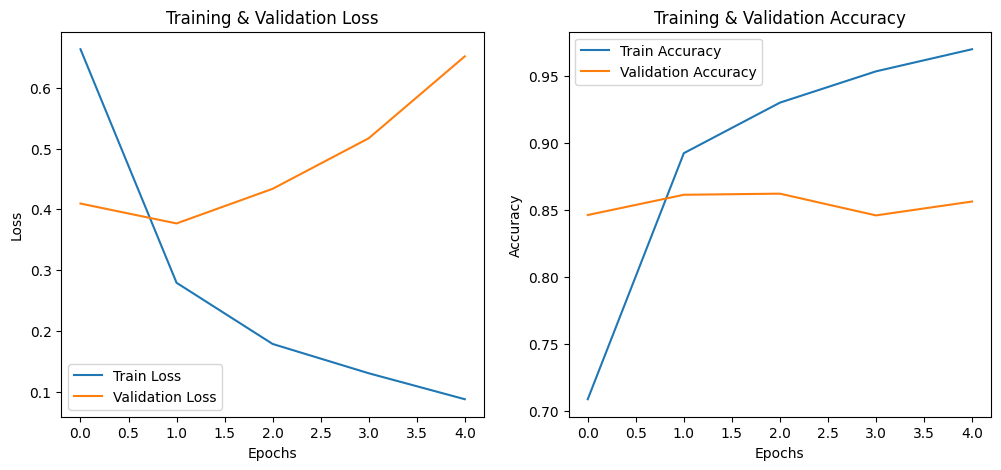

In [ ]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Ambil 5000 fitur paling penting
X_tfidf = vectorizer.fit_transform(X).toarray()  # Konversi ke array numpy

# Cek bentuk data hasil ekstraksi
print(X_tfidf.shape)  # Harusnya (17872, 5000)

# Konversi label ke angka
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # Ubah 'positive', 'negative', 'neutral' jadi angka
y_encoded = to_categorical(y_numeric, num_classes=3)  # One-hot encoding
scaler = MinMaxScaler()
X_tfidf_scaled = scaler.fit_transform(X_tfidf)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_numeric)

# Model LSTM
model_lstm = keras.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    layers.LSTM(64),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile model
model_lstm.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Reshape data untuk LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Training model
history_lstm = model_lstm.fit(X_train_lstm, y_train,
                              epochs=20,
                              batch_size=64,
                              validation_data=(X_test_lstm, y_test),
                              callbacks=[early_stopping])

lstm_model = history_lstm.history

# Evaluasi
test_loss, test_acc = model_lstm.evaluate(X_test_lstm, y_test)
print("Akurasi LSTM:", test_acc)

visualize(lstm_model)

## TF-IDF, GRU, 70/30

Shape of X_train_bow: (12510, 5000)
Shape of X_test_bow: (5362, 5000)
Epoch 1/50


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6631 - loss: 0.7921 - val_accuracy: 0.8391 - val_loss: 0.4565
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8515 - loss: 0.4087 - val_accuracy: 0.8558 - val_loss: 0.4028
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8690 - loss: 0.3451 - val_accuracy: 0.8570 - val_loss: 0.4069
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8985 - loss: 0.2771 - val_accuracy: 0.8497 - val_loss: 0.4319
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9120 - loss: 0.2352 - val_accuracy: 0.8529 - val_loss: 0.4288


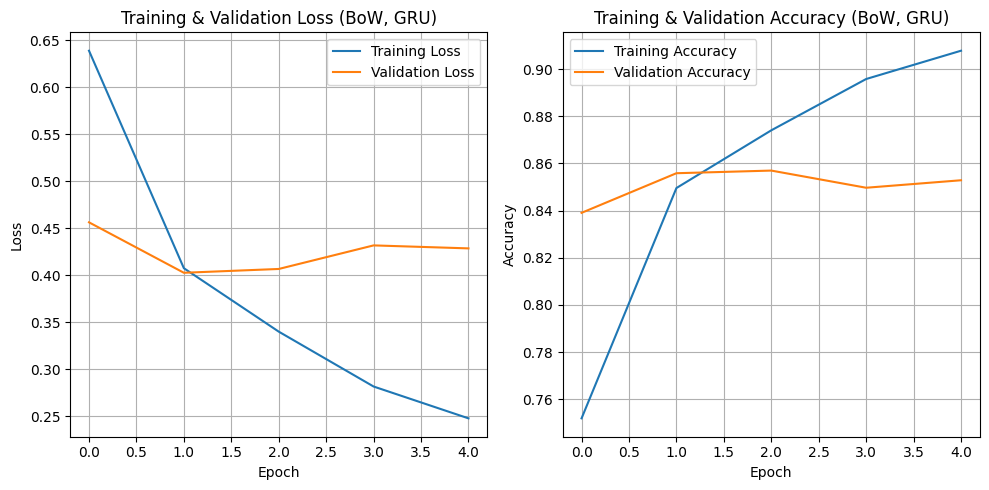

In [ ]:
# Gunakan max_features untuk membatasi jumlah fitur BoW
vectorizer = CountVectorizer(max_features=5000)
X_text = Shopee_clean_df['text_akhir'].values

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42
)

# Fit dan transform data
X_train_bow = vectorizer.fit_transform(X_train_text)
X_test_bow = vectorizer.transform(X_test_text)

# Cek bentuk hasil ekstraksi fitur
print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Encoding label
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train), num_classes=3)
y_test_encoded = to_categorical(label_encoder.transform(y_test), num_classes=3)

# Reshape data for GRU
X_train_bow_reshaped = X_train_bow.toarray().reshape((X_train_bow.shape[0], 1, X_train_bow.shape[1]))
X_test_bow_reshaped = X_test_bow.toarray().reshape((X_test_bow.shape[0], 1, X_test_bow.shape[1]))

# Model GRU dengan Bidirectional (lebih akurat & efisien)
model_bow_gru = Sequential([
    Bidirectional(GRU(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2), 
                  input_shape=(1, X_train_bow.shape[1])),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_bow_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping untuk menghentikan training lebih cepat jika tidak ada perbaikan
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training Model
history = model_bow_gru.fit(X_train_bow_reshaped, y_train_encoded, 
                            epochs=50, batch_size=64, 
                            validation_data=(X_test_bow_reshaped, y_test_encoded),
                            callbacks=[early_stopping])

# Plot hasil training
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (BoW, GRU)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (BoW, GRU)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## BoW, CNN, 70/30


Epoch 1/50


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 52s 261ms/step - accuracy: 0.6557 - loss: 2.5624 - val_accuracy: 0.4771 - val_loss: 10.1354 - learning_rate: 0.0050
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 278ms/step - accuracy: 0.8214 - loss: 0.4639 - val_accuracy: 0.4592 - val_loss: 1.3026 - learning_rate: 0.0050
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 416ms/step - accuracy: 0.8607 - loss: 0.3624 - val_accuracy: 0.6050 - val_loss: 1.2239 - learning_rate: 0.0050
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 78s 397ms/step - accuracy: 0.8794 - loss: 0.3035 - val_accuracy: 0.4593 - val_loss: 43.4594 - learning_rate: 0.0050
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 359ms/step - accuracy: 0.8871 - loss: 0.2591 - val_accuracy: 0.4592 - val_loss: 193.6990 - learning_rate: 0.0050
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 70s 359ms/step - accuracy: 0.9014 - loss: 0.2314 - val_accuracy: 0.0638 - val_loss: 229.4727 - learning_rate: 0.0050
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 72s 370ms/step - accuracy: 0.9185 -

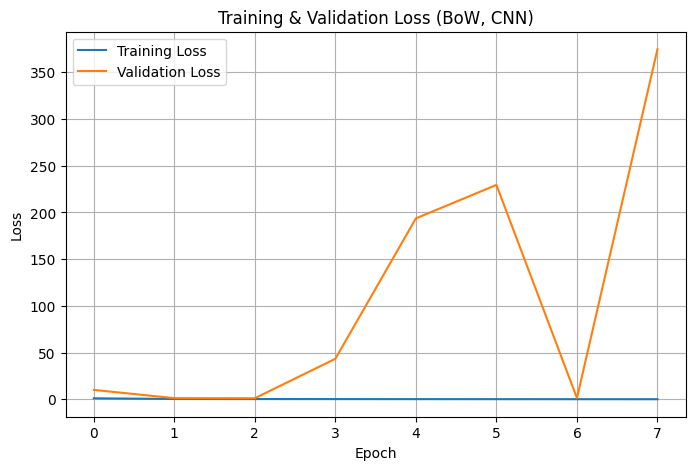

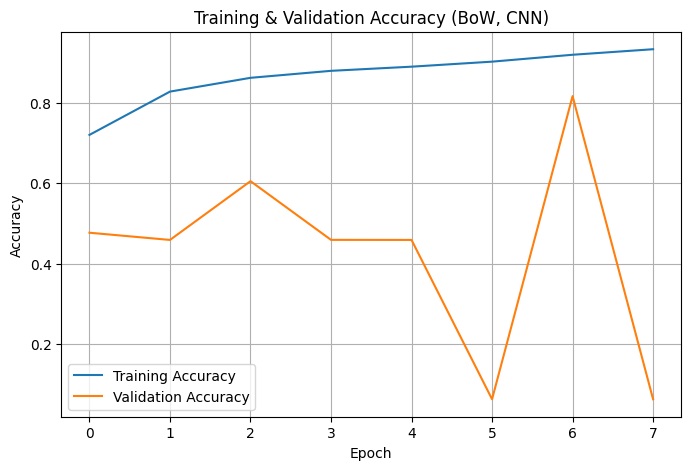

In [ ]:
# Gunakan TfidfVectorizer untuk representasi fitur yang lebih baik
vectorizer = TfidfVectorizer(max_features=5000)  # Batasi fitur untuk efisiensi

# Gunakan data teks asli
X_text = Shopee_clean_df['text_akhir'].values

# Split dataset
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42, stratify=y
)

# Fit & transform data menggunakan TF-IDF
X_train_bow = vectorizer.fit_transform(X_train_text).astype(np.float32)
X_test_bow = vectorizer.transform(X_test_text).astype(np.float32)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train), num_classes=3)
y_test_encoded = to_categorical(label_encoder.transform(y_test), num_classes=3)

# Ubah data menjadi array 3D untuk CNN (gunakan sparse tensor untuk efisiensi)
X_train_bow_reshaped = np.expand_dims(X_train_bow.toarray(), axis=-1)
X_test_bow_reshaped = np.expand_dims(X_test_bow.toarray(), axis=-1)

# Model CNN yang lebih optimal
model_bow_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_bow.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile model dengan optimizer Adam yang lebih stabil
model_bow_cnn.compile(optimizer=Adam(learning_rate=0.005),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Callbacks untuk EarlyStopping dan ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train model
bow_cnn_model = model_bow_cnn.fit(
    X_train_bow_reshaped, y_train_encoded,
    epochs=50, batch_size=64,
    validation_data=(X_test_bow_reshaped, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

history_bow_cnn = bow_cnn_model.history

# Fungsi untuk plotting hasil training
def plot_history(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.get('loss', []), label='Training Loss')
    plt.plot(history.get('val_loss', []), label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training & Validation Loss ({title})')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.plot(history.get('accuracy', []), label='Training Accuracy')
    plt.plot(history.get('val_accuracy', []), label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training & Validation Accuracy ({title})')
    plt.legend()
    plt.grid()
    plt.show()

# Plot hasil training
plot_history(history_bow_cnn, "BoW, CNN")

## BoW, LSTM, 70/30

Epoch 1/20


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - accuracy: 0.4669 - loss: 0.9369 - val_accuracy: 0.4803 - val_loss: 0.8885
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.4744 - loss: 0.8931 - val_accuracy: 0.4818 - val_loss: 0.8878
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.4909 - loss: 0.8929 - val_accuracy: 0.5092 - val_loss: 0.8856
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.5020 - loss: 0.8789 - val_accuracy: 0.5072 - val_loss: 0.8855
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.4941 - loss: 0.8900 - val_accuracy: 0.5085 - val_loss: 0.8839
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.4972 - loss: 0.8891 - val_accuracy: 0.5139 - val_loss: 0.8829
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.5095 - loss: 0.8857 - val_accuracy: 0.5094 - val_loss: 0.8831
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.5053 - loss: 0.8823 - val_accuracy: 0.514

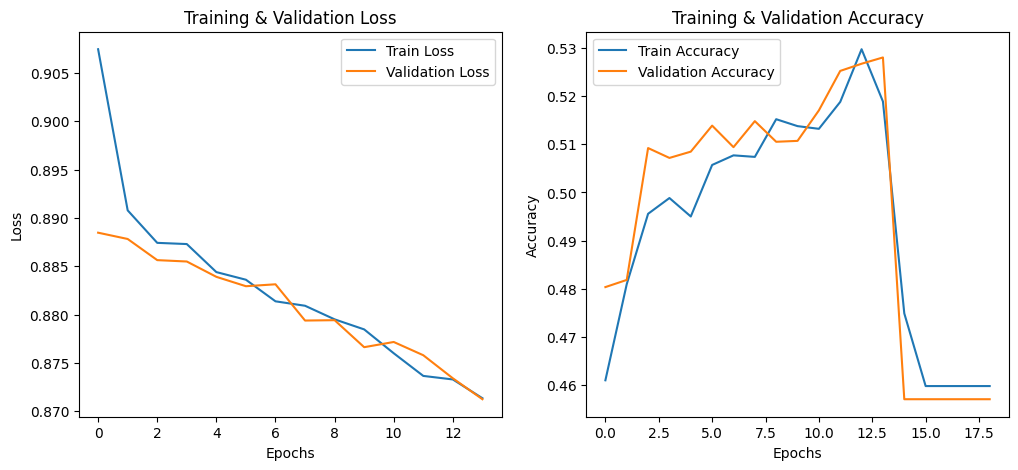

In [ ]:
# Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

MAX_WORDS = 200 

# Initialize and fit CountVectorizer
vectorizer = CountVectorizer(max_features=MAX_WORDS)  # Batasi fitur untuk menghindari dimensi besar
X_train_bow = vectorizer.fit_transform(X_train_text)
X_test_bow = vectorizer.transform(X_test_text)

# Convert sparse matrix to dense array
X_train_bow = X_train_bow.toarray()
X_test_bow = X_test_bow.toarray()

# Label encoding & one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Model Definition
model_bow_lstm = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128),  # Embedding
    LSTM(64, activation='relu', return_sequences=True),  # LSTM pertama
    Dropout(0.3),
    LSTM(num_classes, activation='softmax')
])

# Compile model
model_bow_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model_bow_lstm.fit(
    X_train_bow, y_train_encoded,
    epochs=20, batch_size=128,
    validation_data=(X_test_bow, y_test_encoded),
    callbacks=[early_stopping]
)

visualize(history.history)

## BoW, GRU, 70/30

/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.6933 - loss: 0.8325 - val_accuracy: 0.8260 - val_loss: 0.5301
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8871 - loss: 0.3816 - val_accuracy: 0.8607 - val_loss: 0.4181
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9252 - loss: 0.2199 - val_accuracy: 0.8678 - val_loss: 0.3932
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9619 - loss: 0.1367 - val_accuracy: 0.8691 - val_loss: 0.4063
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9804 - loss: 0.0868 - val_accuracy: 0.8655 - val_loss: 0.4215
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9902 - loss: 0.0587 - val_accuracy: 0.8676 - val_loss: 0.4444
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9924 - loss: 0.0435 - val_accuracy: 0.8633 - val_loss: 0.4800
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9952 - loss: 0.0308 - val_accuracy: 0.

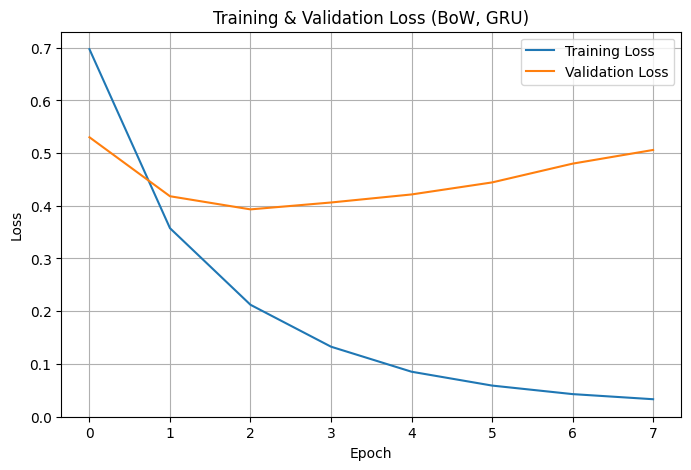

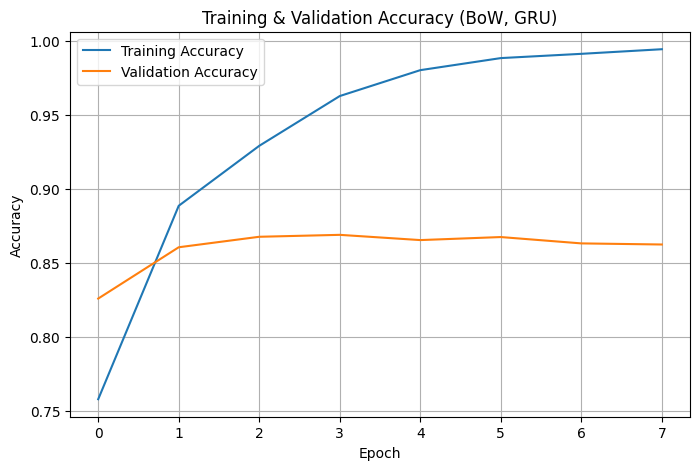

In [ ]:
X_text = Shopee_clean_df['text_akhir'].values

# Split the text data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42
)

# Initialize BoW vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training text data
X_train_bow = vectorizer.fit_transform(X_train_text)

# Transform the testing text data using the fitted vectorizer
X_test_bow = vectorizer.transform(X_test_text)

# Reshape data for GRU (add a time dimension)
X_train_bow_reshaped = X_train_bow.toarray().reshape((X_train_bow.shape[0], 1, X_train_bow.shape[1]))
X_test_bow_reshaped = X_test_bow.toarray().reshape((X_test_bow.shape[0], 1, X_test_bow.shape[1]))

#Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = 3 # Assuming 3 classes for sentiment (positive, negative, neutral)
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Define the GRU model
model_bow_gru = Sequential()
model_bow_gru.add(GRU(128, input_shape=(X_train_bow_reshaped.shape[1], X_train_bow_reshaped.shape[2])))
model_bow_gru.add(Dropout(0.2))
model_bow_gru.add(Dense(3, activation='softmax')) # Assuming 3 classes

# Compile the model
model_bow_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
bow_gru_model = model_bow_gru.fit(X_train_bow_reshaped,
                                  y_train_encoded,
                                  epochs=100,
                                  batch_size=128,
                                  validation_data=(X_test_bow_reshaped, y_test_encoded),
                                  callbacks=[early_stopping])

# Evaluate the model and plot results as needed (similar to your existing code)
# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(bow_gru_model.history['loss'], label='Training Loss')
plt.plot(bow_gru_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (BoW, GRU)')
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(bow_gru_model.history['accuracy'], label='Training Accuracy')
plt.plot(bow_gru_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (BoW, GRU)')
plt.legend()
plt.grid()
plt.show()

## N-gram, CNN, 70/30

Epoch 1/100


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - accuracy: 0.7162 - loss: 0.8467 - val_accuracy: 0.8299 - val_loss: 0.4821
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.8716 - loss: 0.3477 - val_accuracy: 0.8308 - val_loss: 0.5116
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 211ms/step - accuracy: 0.9264 - loss: 0.2138 - val_accuracy: 0.8308 - val_loss: 0.5068
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 232ms/step - accuracy: 0.9650 - loss: 0.1082 - val_accuracy: 0.8294 - val_loss: 0.6429
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 47s 238ms/step - accuracy: 0.9729 - loss: 0.0844 - val_accuracy: 0.8239 - val_loss: 0.7410
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 232ms/step - accuracy: 0.9782 - loss: 0.0706 - val_accuracy: 0.8295 - val_loss: 0.7902


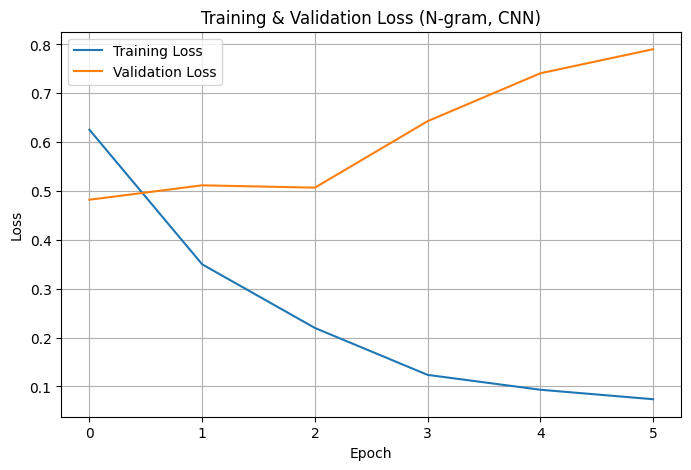

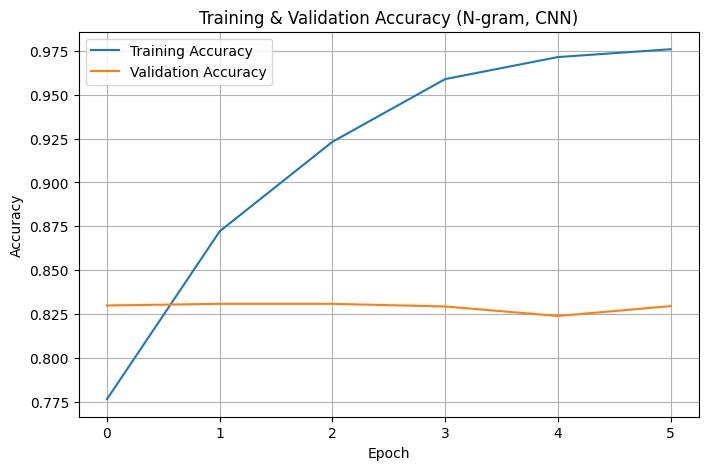

In [ ]:
# Split the text data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42
)

# Initialize N-gram vectorizer (e.g., bigrams)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)  # Experiment with different values

# Fit and transform the training text data
X_train_ngram = ngram_vectorizer.fit_transform(X_train_text)

# Transform the testing text data using the fitted vectorizer
X_test_ngram = ngram_vectorizer.transform(X_test_text)

# Reshape data for CNN
X_train_ngram_reshaped = X_train_ngram.toarray().reshape((X_train_ngram.shape[0], X_train_ngram.shape[1], 1))
X_test_ngram_reshaped = X_test_ngram.toarray().reshape((X_test_ngram.shape[0], X_test_ngram.shape[1], 1))


# CNN Model for N-gram
model_ngram_cnn = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train_ngram.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_ngram_cnn.compile(optimizer=Adam(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

ngram_cnn_model = model_ngram_cnn.fit(X_train_ngram_reshaped,
                                 y_train_encoded,
                                 epochs=100,
                                 batch_size=64,
                                 validation_data=(X_test_ngram_reshaped, y_test_encoded),
                                 callbacks=[early_stopping])

history_ngram_cnn = ngram_cnn_model.history

# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history_ngram_cnn['loss'], label='Training Loss')
plt.plot(history_ngram_cnn['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (N-gram, CNN)')
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_ngram_cnn['accuracy'], label='Training Accuracy')
plt.plot(history_ngram_cnn['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (N-gram, CNN)')
plt.legend()
plt.grid()
plt.show()


## N-gram, LSTM, 70/30


Epoch 1/100


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6150 - loss: 0.9298 - val_accuracy: 0.7648 - val_loss: 0.6534
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.5932 - val_accuracy: 0.8187 - val_loss: 0.5308
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8380 - loss: 0.4809 - val_accuracy: 0.8348 - val_loss: 0.4890
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8407 - loss: 0.4462 - val_accuracy: 0.8355 - val_loss: 0.4753
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.4300 - val_accuracy: 0.8387 - val_loss: 0.4714
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.4026 - val_accuracy: 0.8405 - val_loss: 0.4654
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.3920 - val_accuracy: 0.8420 - val_loss: 0.4661
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.3847 - val_accuracy: 0.8385 - val_loss: 0.4

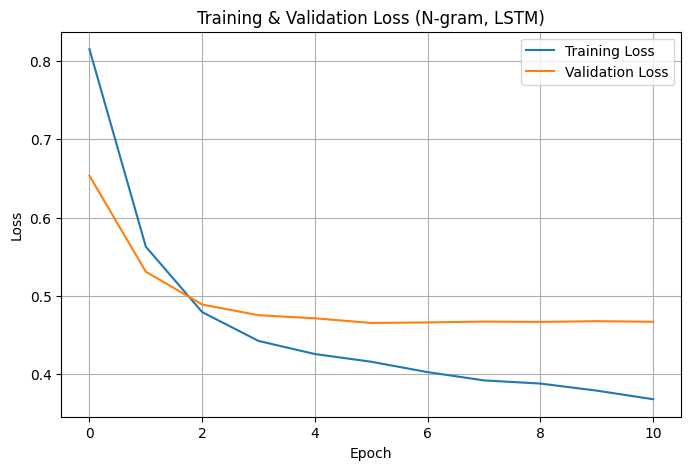

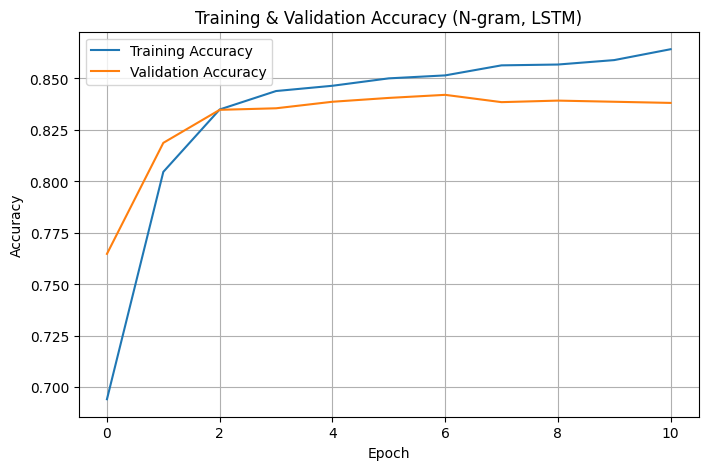

In [ ]:
# Split the text data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42
)

# Initialize N-gram vectorizer (e.g., bigrams)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=500)  # Experiment with different values

# Fit and transform the training text data
X_train_ngram = ngram_vectorizer.fit_transform(X_train_text)

# Transform the testing text data using the fitted vectorizer
X_test_ngram = ngram_vectorizer.transform(X_test_text)


# Reshape data for LSTM (add a time dimension)
X_train_ngram_reshaped = X_train_ngram.toarray().reshape((X_train_ngram.shape[0], 1, X_train_ngram.shape[1]))
X_test_ngram_reshaped = X_test_ngram.toarray().reshape((X_test_ngram.shape[0], 1, X_test_ngram.shape[1]))

#Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = 3 # Assuming 3 classes for sentiment (positive, negative, neutral)
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Define the LSTM model
model_ngram_lstm = Sequential()
model_ngram_lstm.add(LSTM(128, input_shape=(X_train_ngram_reshaped.shape[1], X_train_ngram_reshaped.shape[2])))
model_ngram_lstm.add(Dropout(0.5))
model_ngram_lstm.add(Dense(3, activation='sigmoid')) # Assuming 3 classes

# Compile the model
model_ngram_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ngram_lstm_model = model_ngram_lstm.fit(X_train_ngram_reshaped,
                                  y_train_encoded,
                                  epochs=100,
                                  batch_size=128,
                                  validation_data=(X_test_ngram_reshaped, y_test_encoded),
                                  callbacks=[early_stopping])


# Evaluate the model and plot results as needed (similar to your existing code)
# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(ngram_lstm_model.history['loss'], label='Training Loss')
plt.plot(ngram_lstm_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (N-gram, LSTM)')
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(ngram_lstm_model.history['accuracy'], label='Training Accuracy')
plt.plot(ngram_lstm_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (N-gram, LSTM)')
plt.legend()
plt.grid()
plt.show()


## N-gram, GRU, 70/30

Epoch 1/100


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6869 - loss: 0.8226 - val_accuracy: 0.8290 - val_loss: 0.5192
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8749 - loss: 0.3926 - val_accuracy: 0.8551 - val_loss: 0.4253
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9107 - loss: 0.2643 - val_accuracy: 0.8596 - val_loss: 0.4126
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9353 - loss: 0.1909 - val_accuracy: 0.8570 - val_loss: 0.4444
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9578 - loss: 0.1364 - val_accuracy: 0.8560 - val_loss: 0.4738
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9731 - loss: 0.1033 - val_accuracy: 0.8525 - val_loss: 0.5275
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9818 - loss: 0.0813 - val_accuracy: 0.8568 - val_loss: 0.5658
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9884 - loss: 0.0621 - val_accuracy: 0.8502 - val_l

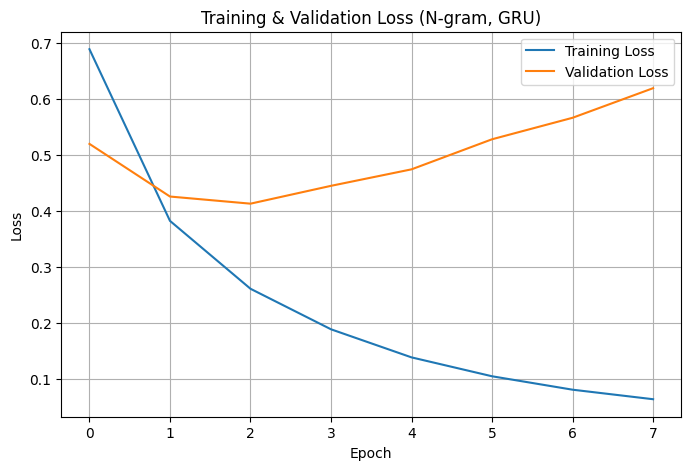

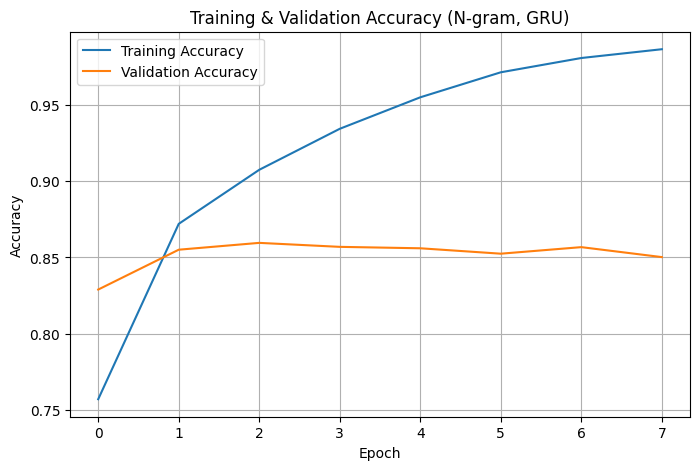

In [ ]:
# Split the text data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.3, random_state=42
)

# Initialize N-gram vectorizer (e.g., bigrams)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)  # Experiment with different values

# Fit and transform the training text data
X_train_ngram = ngram_vectorizer.fit_transform(X_train_text)

# Transform the testing text data using the fitted vectorizer
X_test_ngram = ngram_vectorizer.transform(X_test_text)


# Reshape data for GRU (add a time dimension)
X_train_ngram_reshaped = X_train_ngram.toarray().reshape((X_train_ngram.shape[0], 1, X_train_ngram.shape[1]))
X_test_ngram_reshaped = X_test_ngram.toarray().reshape((X_test_ngram.shape[0], 1, X_test_ngram.shape[1]))

#Perform label encoding and one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = 3 # Assuming 3 classes for sentiment (positive, negative, neutral)
y_train_encoded = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_encoded, num_classes=num_classes)

# Define the GRU model
model_ngram_gru = Sequential()
model_ngram_gru.add(GRU(128, input_shape=(X_train_ngram_reshaped.shape[1], X_train_ngram_reshaped.shape[2])))
model_ngram_gru.add(Dropout(0.2))
model_ngram_gru.add(Dense(3, activation='softmax')) # Assuming 3 classes

# Compile the model
model_ngram_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ngram_gru_model = model_ngram_gru.fit(X_train_ngram_reshaped,
                                  y_train_encoded,
                                  epochs=100,
                                  batch_size=128,
                                  validation_data=(X_test_ngram_reshaped, y_test_encoded),
                                  callbacks=[early_stopping])


# Evaluate the model and plot results as needed (similar to your existing code)
# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(ngram_gru_model.history['loss'], label='Training Loss')
plt.plot(ngram_gru_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss (N-gram, GRU)')
plt.legend()
plt.grid()
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(ngram_gru_model.history['accuracy'], label='Training Accuracy')
plt.plot(ngram_gru_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (N-gram, GRU)')
plt.legend()
plt.grid()
plt.show()


# Mengambil Kombinasi Terbaik

Apabila dilihat dari grafik, terdapat kombinasi yang memiliki akurasi yang baik, yaitu :

- TF-IDF, LSTM
- TF-IDF, GRU
- Ngram, LSTM

Akan tetapi, ketiga kombinasi ini mengalami *overfitting*, hal ini tercermin dari grafik dimana model memiliki akurasi yang baik pada dataset training, tetapi memiliki akurasi yang stagnasi pada dataset testing. Oleh karen itu, selanjutnya kita bisa melakukan optimalisasi untuk ketiga model ini dengan beberapa cara:
1. Regularisasi
2. Early Stopping
3. Augmentasi Data
4. Menggunakan Model yang lebih kecil
5. Batch Normalization
6. Embedding Layer
7. Teknik Fine-tuning
8. Mencoba Optuna

In [73]:
%pip install optuna

  Using cached optuna-4.2.1-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.15.1-py3-none-any.whl.metadata (7.2 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.9-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.2.1-py3-none-any.whl (383 kB)
Using cached alembic-1.15.1-py3-none-any.whl (231 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:0016.1 MB/s eta 0:00:01
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached Mako-1.3.9-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:

# import numpy as np
# import pandas as pd
# import nltk
# import matplotlib.pyplot as plt
# import optuna
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.model_selection import StratifiedKFold
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Input
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam

# # Download nltk jika diperlukan
# nltk.download('punkt')

# # Load dataset
# X = np.array(Shopee_balanced_df['text_akhir'])
# y = np.array(Shopee_balanced_df['polarity'])

# # Label encoding
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# num_classes = len(np.unique(y_encoded))
# y_encoded = to_categorical(y_encoded, num_classes=num_classes)

# # Inisialisasi TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=1000)

# # Stratified K-Fold
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # **Fungsi untuk mencari hyperparameter terbaik**
# def objective(trial):
#     # Hyperparameters yang akan diuji
#     n_units_1 = trial.suggest_categorical('n_units_1', [64, 128, 256])  # Jumlah neuron di layer 1
#     n_units_2 = trial.suggest_categorical('n_units_2', [64, 128, 256])  # Jumlah neuron di layer 2
#     dropout_rate_1 = trial.suggest_float('dropout_rate_1', 0.2, 0.5)  # Dropout layer 1
#     dropout_rate_2 = trial.suggest_float('dropout_rate_2', 0.2, 0.5)  # Dropout layer 2
#     learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.01, log=True)  # Learning rate
#     batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])  # Batch size

#     fold_accuracies = []
    
#     for train_idx, test_idx in kfold.split(X, y):  
#         X_train_text, X_test_text = X[train_idx], X[test_idx]
#         y_train_fold, y_test_fold = y_encoded[train_idx], y_encoded[test_idx]

#         # TF-IDF Fit + Transform
#         X_train_tfidf = vectorizer.fit_transform(X_train_text).toarray()
#         X_test_tfidf = vectorizer.transform(X_test_text).toarray()


#         # Model Definition
#         model = Sequential([
#             Input(shape=(X_train_tfidf.shape[1],)),
#             Dense(n_units_1, activation='relu'),
#             Dropout(dropout_rate_1),
#             Dense(n_units_2, activation='relu'),
#             Dropout(dropout_rate_2),
#             Dense(num_classes, activation='softmax')
#         ])

#         # Compile model
#         model.compile(loss='categorical_crossentropy', 
#                       optimizer=Adam(learning_rate=learning_rate), 
#                       metrics=['accuracy'])

#         # Callbacks
#         early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#         # Train model
#         history = model.fit(
#             X_train_tfidf, y_train_fold,
#             epochs=10, batch_size=batch_size,
#             validation_data=(X_test_tfidf, y_test_fold),
#             callbacks=[early_stopping],
#             verbose=0
#         )

#         # Simpan akurasi terbaik
#         acc = max(history.history['val_accuracy'])
#         fold_accuracies.append(acc)

#     # Kembalikan rata-rata akurasi dari semua fold
#     return np.mean(fold_accuracies)

# # **Jalankan Optuna untuk mencari hyperparameter terbaik**
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)  # Uji 20 kombinasi hyperparameter

# # **Tampilkan hasil terbaik**
# print("\nBest Hyperparameters:", study.best_params)
# print("Best Accuracy:", study.best_value)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[I 2025-03-23 11:49:51,324] A new study created in memory with name: no-name-4180a0a9-176a-4575-ad1e-c41639179594
[I 2025-03-23 11:50:02,625] Trial 0 finished with value: 0.9225236773490906 and parameters: {'n_units_1': 128, 'n_units_2': 64, 'dropout_rate_1': 0.3164764216277561, 'dropout_rate_2': 0.36412586985334766, 'learning_rate': 0.0024650395812711207, 'batch_size': 128}. Best is trial 0 with value: 0.9225236773490906.
[I 2025-03-23 11:50:25,470] Trial 1 finished with value: 0.9254987716674805 and parameters: {'n_units_1': 256, 'n_units_2': 128, 'dropout_rate_1': 0.4065913008775446, 'dropout_rate_2': 0.47146392158579553, 'learning_rate': 0.000869917349895993, 'batch_size': 128}. Best is trial 1 with value: 0.9254987716674805.
[I 2025-03-23 11:50:45,843] Trial 2 finished with value: 0.9217193603515625 and parameters: {'n_units_


Best Hyperparameters: {'n_units_1': 256, 'n_units_2': 256, 'dropout_rate_1': 0.21853473479090396, 'dropout_rate_2': 0.3505828016471591, 'learning_rate': 0.0003367607866098063, 'batch_size': 64}
Best Accuracy: 0.9293988466262817


In [ ]:
# 🔹 N-gram Vectorizer (unigram + bigram, top 5000 kata/phrase)
vectorizer = CountVectorizer(ngram_range=(1,2), max_features=1000)
X_ngram = vectorizer.fit_transform(X).toarray()

# 🔹 Konversi label ke angka
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)  # 'positive', 'negative', 'neutral' -> angka

# 🔹 Normalisasi data
scaler = MinMaxScaler()
X_ngram_scaled = scaler.fit_transform(X_ngram)

# 🔹 Terapkan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_ngram_scaled, y_numeric)

# 🔹 Stratified K-Fold Cross Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_resampled, y_resampled)):
    print(f"\n🔹 Training Fold {fold+1}...\n")

    # Membagi data berdasarkan indeks yang diberikan oleh Stratified K-Fold
    X_train, X_test = X_resampled[train_idx], X_resampled[test_idx]
    y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

    # 🔹 Konversi label ke One-Hot Encoding setelah pembagian K-Fold
    y_train_onehot = keras.utils.to_categorical(y_train, num_classes=3)
    y_test_onehot = keras.utils.to_categorical(y_test, num_classes=3)

    # 🔹 Reshape data untuk CNN
    X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # 🔹 Model CNN
    model_cnn = keras.Sequential([
        layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(3, activation='softmax')
    ])

    # 🔹 Compile model CNN
    model_cnn.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    # 🔹 Callback untuk Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 🔹 Training model CNN
    history = model_cnn.fit(X_train_cnn, y_train_onehot, epochs=20, batch_size=128, 
                            validation_data=(X_test_cnn, y_test_onehot), callbacks=[early_stopping])

    # 🔹 Evaluasi model CNN pada fold ini
    test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_onehot)
    print(f"✅ Akurasi Fold {fold+1}: {test_acc:.4f}")

    fold_accuracies.append(test_acc)


# 🔹 Akurasi Rata-rata
print(f"\n📌 Rata-rata Akurasi dari 5 Fold: {np.mean(fold_accuracies):.4f}")


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



🔹 Training Fold 1...

Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.6226 - loss: 0.8308 - val_accuracy: 0.7846 - val_loss: 0.5509
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8080 - loss: 0.4898 - val_accuracy: 0.8255 - val_loss: 0.4625
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8730 - loss: 0.3516 - val_accuracy: 0.8519 - val_loss: 0.4095
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - accuracy: 0.9153 - loss: 0.2509 - val_accuracy: 0.8769 - val_loss: 0.3661
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9374 - loss: 0.1871 - val_accuracy: 0.8822 - val_loss: 0.3581
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.9518 - loss: 0.1467 - val_accuracy: 0.9009 - val_loss: 0.3344
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 153ms/step - accuracy: 0.9661 - loss: 0.1103 - val_accuracy: 0.8972 - val_loss: 0.3672
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 136ms/step - accuracy: 0.9707 - loss: 0.0913 - val_acc

In [ ]:
# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_encoded = to_categorical(y_encoded, num_classes=num_classes)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X).toarray()

# **Pastikan label tetap integer sebelum SMOTE**
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah label string ke integer
num_classes = len(np.unique(y_encoded))  # Hitung jumlah kelas

# **Gunakan SMOTE dengan label integer**
smote = SMOTE(sampling_strategy="not majority", random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)  # y tetap integer

# **Stratified K-Fold**
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# **Fungsi untuk mencari hyperparameter terbaik**
def objective(trial):
    # Hyperparameters
    n_units_1 = trial.suggest_categorical('n_units_1', [64, 128, 256])
    n_units_2 = trial.suggest_categorical('n_units_2', [64, 128, 256])
    dropout_rate_1 = trial.suggest_float('dropout_rate_1', 0.2, 0.5)
    dropout_rate_2 = trial.suggest_float('dropout_rate_2', 0.2, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.01, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    fold_accuracies = []
    
    for train_idx, test_idx in kfold.split(X_resampled, y_resampled):  
        X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
        y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]

        # **Konversi label ke one-hot encoding setelah pemisahan data**
        y_train_fold = to_categorical(y_train_fold, num_classes=num_classes)
        y_test_fold = to_categorical(y_test_fold, num_classes=num_classes)

        # **Model Definition**
        model = Sequential([
            Input(shape=(X_train_fold.shape[1],)),
            Dense(n_units_1, activation='relu'),
            Dropout(dropout_rate_1),
            Dense(n_units_2, activation='relu'),
            Dropout(dropout_rate_2),
            Dense(num_classes, activation='softmax')  # Output tetap sesuai jumlah kelas
        ])

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(learning_rate=learning_rate), 
                      metrics=['accuracy'])

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train model
        history = model.fit(
            X_train_fold, y_train_fold,
            epochs=10, batch_size=batch_size,
            validation_data=(X_test_fold, y_test_fold),
            callbacks=[early_stopping],
            verbose=0
        )

        # Simpan akurasi terbaik
        acc = max(history.history['val_accuracy'])
        fold_accuracies.append(acc)

    # Kembalikan rata-rata akurasi dari semua fold
    return np.mean(fold_accuracies)

# **Jalankan Optuna untuk mencari hyperparameter terbaik**
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Uji 20 kombinasi hyperparameter

# **Tampilkan hasil terbaik**
print("\nBest Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/opt/anaconda3/envs/DL/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
[I 2025-03-23 22:41:37,711] A new study created in memory with name: no-name-c23332b5-0e2b-4477-8abf-197063979c8f
[I 2025-03-23 22:41:55,988] Trial 0 finished with value: 0.9258825182914734 and parameters: {'n_units_1': 256, 'n_units_2': 256, 'dropout_rate_1': 0.40875479726689024, 'dropout_rate_2': 0.42126850145871453, 'learning_rate': 0.0007728428982044274, 'batch_size': 128}. Best is trial 0 with value: 0.9258825182914734.
[I 2025-03-23 22:42:09,830] Trial 1 finished with value: 0.9250224232673645 and parameters: {'n_uni


Best Hyperparameters: {'n_units_1': 256, 'n_units_2': 256, 'dropout_rate_1': 0.4297504021711451, 'dropout_rate_2': 0.49981042821704647, 'learning_rate': 0.0005898090659561625, 'batch_size': 128}
Best Accuracy: 0.9267424821853638


CEK kombinasi

## Optimized TF-IDF, LSTM

/opt/anaconda3/envs/DL/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4876 - loss: 0.9660 - val_accuracy: 0.8788 - val_loss: 0.3383
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9291 - loss: 0.2131 - val_accuracy: 0.9075 - val_loss: 0.2695
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9672 - loss: 0.1003 - val_accuracy: 0.9200 - val_loss: 0.2624
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9838 - loss: 0.0550 - val_accuracy: 0.9197 - val_loss: 0.2975
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9862 - loss: 0.0426 - val_accuracy: 0.9138 - val_loss: 0.3324
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.9171 - val_loss: 0.3601
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9182 - loss: 0.2599
Akurasi TF-IDF + LSTM: 0.9200104475021362


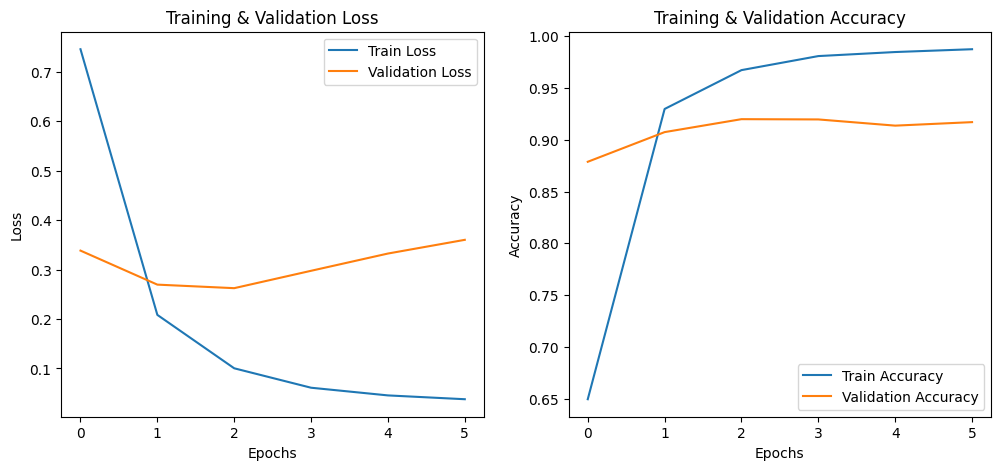

In [ ]:
# **TF-IDF Vectorization**
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X).toarray()

# **SMOTE untuk menangani imbalance**
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# **Split data**
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=42
)

# **One-hot encoding**
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# **Model TF-IDF + LSTM**
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

# Reshape data untuk LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model.fit(X_train_lstm, y_train_encoded, epochs=20, batch_size=128, validation_data=(X_test_lstm, y_test_encoded), callbacks=[early_stopping])

lstm_model = history_lstm.history

# Evaluasi
test_loss, test_acc = model.evaluate(X_test_lstm, y_test_encoded)
print("Akurasi TF-IDF + LSTM:", test_acc)

visualize(lstm_model)

## Optimized TF-IDF + GRU

In [ ]:
# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))
y_encoded = to_categorical(y_encoded, num_classes=num_classes)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X).toarray()

# **Pastikan label tetap integer sebelum SMOTE**
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah label string ke integer
num_classes = len(np.unique(y_encoded))  # Hitung jumlah kelas

# **Gunakan SMOTE dengan label integer**
smote = SMOTE(sampling_strategy="not majority", random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)  # y tetap integer

# **Stratified K-Fold**
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# **Fungsi untuk mencari hyperparameter terbaik**
def objective(trial):
    # Hyperparameters
    n_units_1 = trial.suggest_categorical('n_units_1', [64, 128, 256])
    n_units_2 = trial.suggest_categorical('n_units_2', [64, 128, 256])
    dropout_rate_1 = trial.suggest_float('dropout_rate_1', 0.2, 0.5)
    dropout_rate_2 = trial.suggest_float('dropout_rate_2', 0.2, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 0.0001, 0.01, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    fold_accuracies = []
    
    for train_idx, test_idx in kfold.split(X_resampled, y_resampled):  
        X_train_fold, X_test_fold = X_resampled[train_idx], X_resampled[test_idx]
        y_train_fold, y_test_fold = y_resampled[train_idx], y_resampled[test_idx]

        # **Konversi label ke one-hot encoding setelah pemisahan data**
        y_train_fold = to_categorical(y_train_fold, num_classes=num_classes)
        y_test_fold = to_categorical(y_test_fold, num_classes=num_classes)

        # **Model Definition**
        model = Sequential([
            Input(shape=(X_train_fold.shape[1],)),
            Dense(n_units_1, activation='relu'),
            Dropout(dropout_rate_1),
            Dense(n_units_2, activation='relu'),
            Dropout(dropout_rate_2),
            Dense(num_classes, activation='softmax')  # Output tetap sesuai jumlah kelas
        ])

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(learning_rate=learning_rate), 
                      metrics=['accuracy'])

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Train model
        history = model.fit(
            X_train_fold, y_train_fold,
            epochs=10, batch_size=batch_size,
            validation_data=(X_test_fold, y_test_fold),
            callbacks=[early_stopping],
            verbose=0
        )

        # Simpan akurasi terbaik
        acc = max(history.history['val_accuracy'])
        fold_accuracies.append(acc)

    # Kembalikan rata-rata akurasi dari semua fold
    return np.mean(fold_accuracies)

# **Jalankan Optuna untuk mencari hyperparameter terbaik**
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Uji 20 kombinasi hyperparameter

# **Tampilkan hasil terbaik**
print("\nBest Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/feiveljethroezhekielgmail.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/opt/anaconda3/envs/DL/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
[I 2025-03-23 22:41:37,711] A new study created in memory with name: no-name-c23332b5-0e2b-4477-8abf-197063979c8f
[I 2025-03-23 22:41:55,988] Trial 0 finished with value: 0.9258825182914734 and parameters: {'n_units_1': 256, 'n_units_2': 256, 'dropout_rate_1': 0.40875479726689024, 'dropout_rate_2': 0.42126850145871453, 'learning_rate': 0.0007728428982044274, 'batch_size': 128}. Best is trial 0 with value: 0.9258825182914734.
[I 2025-03-23 22:42:09,830] Trial 1 finished with value: 0.9250224232673645 and parameters: {'n_uni


Best Hyperparameters: {'n_units_1': 256, 'n_units_2': 256, 'dropout_rate_1': 0.4297504021711451, 'dropout_rate_2': 0.49981042821704647, 'learning_rate': 0.0005898090659561625, 'batch_size': 128}
Best Accuracy: 0.9267424821853638


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Epoch 1/20


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4991 - loss: 1.0194 - val_accuracy: 0.8616 - val_loss: 0.3876
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9193 - loss: 0.2675 - val_accuracy: 0.9127 - val_loss: 0.2584
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9723 - loss: 0.1105 - val_accuracy: 0.9211 - val_loss: 0.2534
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9853 - loss: 0.0598 - val_accuracy: 0.9265 - val_loss: 0.2655
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9902 - loss: 0.0425 - val_accuracy: 0.9250 - val_loss: 0.2858
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9927 - loss: 0.0313 - val_accuracy: 0.9234 - val_loss: 0.3161
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9231 - loss: 0.2421
Akurasi TF-IDF + GRU: 0.9210526347160339


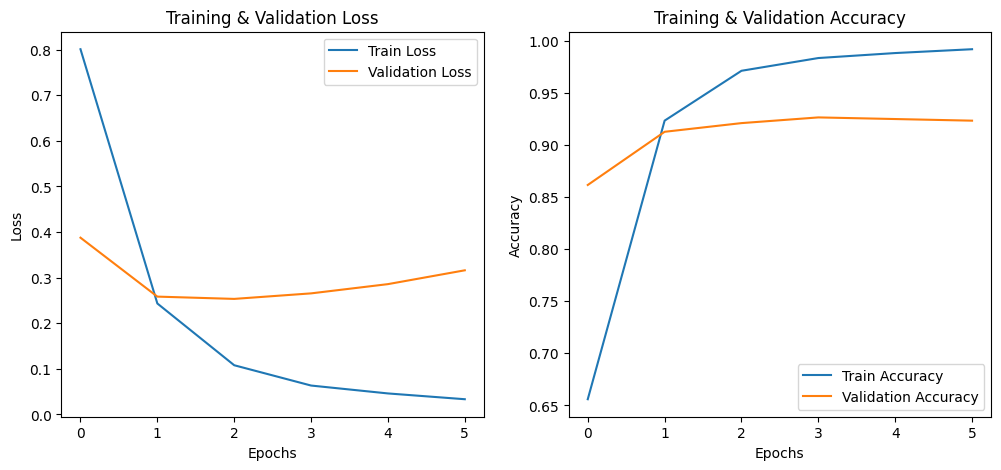

In [143]:
# **TF-IDF Vectorization**
vectorizer = TfidfVectorizer(max_features=6000)
X_tfidf = vectorizer.fit_transform(X).toarray()

# **SMOTE untuk menangani imbalance**
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# **Split data**
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.15, random_state=42
)

# **One-hot encoding**
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# **Model TF-IDF + GRU**
model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dropout(0.3),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])

# **Reshape data untuk GRU**
X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# **Compile dan Training**
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_gru = model.fit(
    X_train_gru, y_train_encoded,
    epochs=20, batch_size=128,
    validation_data=(X_test_gru, y_test_encoded),
    callbacks=[early_stopping]
)

gru_model = history_gru.history

# **Evaluasi Model**
test_loss, test_acc = model.evaluate(X_test_gru, y_test_encoded)
print("Akurasi TF-IDF + GRU:", test_acc)

visualize(history_gru.history)

## Optimized N-gram + LSTM

Epoch 1/10


/opt/anaconda3/envs/DL/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5823 - loss: 0.9061 - val_accuracy: 0.8173 - val_loss: 0.5218
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8700 - loss: 0.4167 - val_accuracy: 0.8495 - val_loss: 0.4308
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9066 - loss: 0.2856 - val_accuracy: 0.8492 - val_loss: 0.4498
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9239 - loss: 0.2201 - val_accuracy: 0.8422 - val_loss: 0.4902
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9292 - loss: 0.1907 - val_accuracy: 0.8448 - val_loss: 0.5093
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.4138
Test Accuracy: 0.8495104908943176


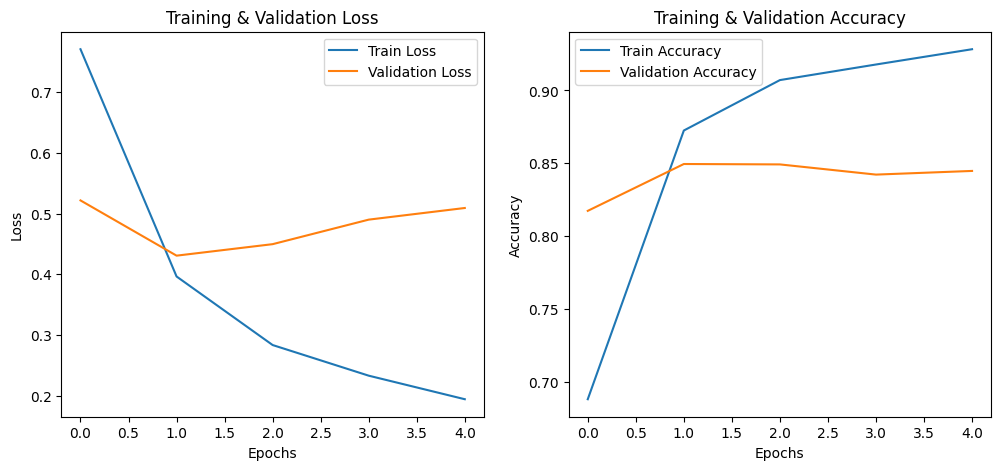

In [ ]:
# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

# N-gram Vectorization (bigram)
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_ngram = vectorizer.fit_transform(X_train_text).toarray()
X_test_ngram = vectorizer.transform(X_test_text).toarray()

# Apply SMOTE to handle class imbalance
# smote = SMOTE(sampling_strategy=0.6, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Label encoding & one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train), num_classes=3)
y_test_encoded = to_categorical(label_encoder.transform(y_test), num_classes=3)

# Reshape for LSTM
X_train_lstm = X_train_ngram.reshape((X_train_ngram.shape[0], 1, X_train_ngram.shape[1]))
X_test_lstm = X_test_ngram.reshape((X_test_ngram.shape[0], 1, X_test_ngram.shape[1]))

# Define LSTM model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train_lstm.shape[2])),
    LSTM(32),
    Dropout(0.5),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history_lstm = model.fit(X_train_lstm, y_train_encoded, 
                    epochs=10, batch_size=128, 
                    validation_data=(X_test_lstm, y_test_encoded), 
                    callbacks=[early_stopping])

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_lstm, y_test_encoded)
print("Test Accuracy:", test_acc)

visualize(history_lstm.history)

# Kesimpulan

Bahwa dengan dataset Ulasan Shopee dari Google Playstore, dapat mengalami overfitting karena dengan 3 kelas sentimen (positif, negatif, dan netral) mengalami *data imbalance* sehingga diperlukan suatu metode agar model tidak dominan pada data mayoritas. Maka saya menggunakan **SMOTE** untuk melakukan *oversampling*. Hal ini tercermin ketika semua kombinasi dijalankan tanpa dilakukan oversampling dan semuanya mengalami *overfitting* yang tercermin dari akurasi data testing lebih stagnan dari akurasi data testing. Kemudian saya menetapkan 3 kombinasi terbaik dari 12 kombinasi, yaitu adalah TF-IDF + LSTM, TF-IDF + GRU, dan N-gram + LSTM. Dari ketiga kombinasi ini, ketika dilakukan SMOTE dan optimasi dengan mencari hyperparameter yang tepat ditemukan yang paling bagus ada pada kombinasi **TF-IDF + GRU** yang dimana hasilnya memiliki **akurasi diatas 92%** alias **92,1%**. Kemudian saya menemukan insight bahwa sebenarnya dataset saya ini sangat sederhana sehingga menggunaakn Multi Layer Perceptron + Optuna(untuk mencari parameter terbaik) sudah didapatkan akurasi diatas 92%. Oleh karena itu, untuk proyek sentimen analisis, sepertinya tidak perlu menggunakan algoritma deep learning yang terlalu kompleks apabila datanya sederhana. Cukup dengan multilayer perceptron dengan sedikit optimasi sudah dapat ditemukan akurasi yang tingi.